In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import seaborn as sn 

دیتا را لود می‌کنیم

In [2]:
data = np.loadtxt("test2.txt")
data_len = len(data)

مقادیر اولیه را مشخص می‌کنیم

In [3]:
dimension = 3
o_p_len = math.factorial(dimension)
ordinal_patterns = list(itertools.permutations([i for i in range(dimension)]))
o_p_arr = np.zeros(data_len - dimension + 1)
o_p_count = np.zeros(o_p_len)
conditional_count_matrix = np.zeros((o_p_len, o_p_len)) # [i][j]: i happened right after j

In [4]:
print("ordinal patterns and their numbers")
for i in range(o_p_len):
    print(f"# {i}: {ordinal_patterns[i]}")

ordinal patterns and their numbers
# 0: (0, 1, 2)
# 1: (0, 2, 1)
# 2: (1, 0, 2)
# 3: (1, 2, 0)
# 4: (2, 0, 1)
# 5: (2, 1, 0)


این تابع شماره اردینال پترن را تشخیص می‌دهد و تعداد هر پترن و الگوی تکرار پترن‌ها را نیز می‌شمارد

In [5]:
def count_ordinal_pattern(ord_pat: tuple, op_index):
    i = 0
    while i < o_p_len:
        if ord_pat == ordinal_patterns[i]:
            o_p_count[i] += 1
            o_p_arr[op_index] = i
            conditional_count_matrix[i][int(o_p_arr[op_index-1])] += 1
            break
        i += 1

آرایه‌ای از دیتا را به اردینال پترن تبدیل می‌کند

In [6]:
def turn_data_to_ordinal_pattern(window: list):
    window_sorted = np.sort(window)
    return tuple(np.where(window_sorted == datum)[0][0] for datum in window)

In [7]:
def detect_ordinal_pattern(window, op_index):
    count_ordinal_pattern(turn_data_to_ordinal_pattern(window), op_index)

کل داده‌ها را پیمایش می‌کنیم

In [8]:
for i in range(data_len - dimension + 1):
    detect_ordinal_pattern(data[i:i+dimension], i) 

تعداد رخ دادن هرکدام از اردینال پترن‌ها. به طرز جالبی پترن ۵ هیچ گاه رخ نمی‌دهد. یعنی نزول متوالی نداریم

In [9]:
for i in range(o_p_len):
    print(f"OP #{i} : {o_p_count[i]}")

OP #0 : 181746.0
OP #1 : 98246.0
OP #2 : 165621.0
OP #3 : 310880.0
OP #4 : 243505.0
OP #5 : 0.0


ماتریس احتمال شرطی و هیت مپ آن را به دست می‌آوریم

In [10]:
conditional_probability_matrix = np.zeros((o_p_len, o_p_len))
for i in range(o_p_len):
    for j in range(o_p_len):
        if o_p_count[j] != 0:
            conditional_probability_matrix[i][j] = conditional_count_matrix[i][j] / o_p_count[j]

In [11]:
for row in conditional_probability_matrix:
    print(row)

[0.         0.         0.         0.         0.74637482 0.        ]
[0.2007582  0.         0.         0.         0.25362518 0.        ]
[0.         1.         0.         0.21672349 0.         0.        ]
[0.7992473  0.         0.99999396 0.         0.         0.        ]
[0.         0.         0.         0.78327651 0.         0.        ]
[0. 0. 0. 0. 0. 0.]


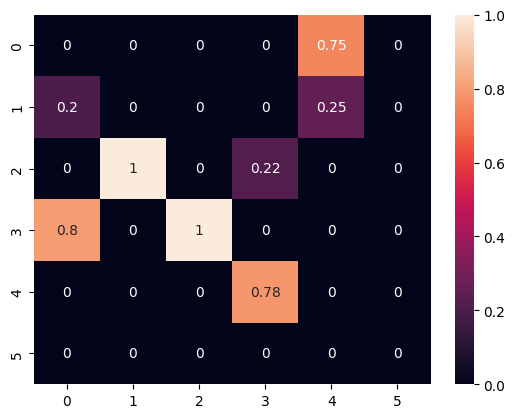

In [12]:
heatmap = sn.heatmap(data=conditional_probability_matrix, annot=True) 
plt.show()

اکثر خانه‌ها صفر هستند. اما خانه‌های جالب خانه‌های ۲۱ و ۳۲ هستند.خانه ۲۱ یعنی اگر پترن ۱ رخ دهد، آنگاه حتما پترن ۲ رخ می‌دهد. خانه ۳۲ هم یعنی اگر پترن ۲ رخ دهد، حتما بعدش پترن ۳ رخ می‌دهد. با ترکیب این دو می‌بینیم که اگر پترن ۱ رخ دهد آنگاه قطعا ۲ و سپس قطعا ۳ رخ می‌دهد

اما چیزهای جالب‌تری نیز می‌توان فهمید. می‌بینیم که سیستم دارد داخل چرخه ۰ به ۳ به ۴ به ۰ می‌چرخد و گاهی در این بین به ۱ و ۲ می‌رود که با توجه به توضیحات قبلی به طور قطعی به ۳ برمی‌گردد و دوباره داخل چرخه می‌چرخد. انگار حالت تعادل سیستم همان چرخیدن در چرخه ۰۳۴۰ است